In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

## Measuring Similarity

- In order to find clusters in a data set we need to have some way of telling how similar two observations are to each other.  
- A cluster is a grouping of samples that are more similar to each other than they are to the samples in another cluster.   
- The first step in understanding clustering is understanding how to measure similarity.


## Similarity and Distance

The key to understanding similarity metrics is to think about measuring distance in the real world. When
we graph a two dimensional data set, we get a layout of points on the plane.   From this it is easy to 
see when two points are similar - they are close to each other on the graph.  In the example below, 
we'd say that the middle (red) point (3.5,4) is closer or more similar to the first point (3,2) than (5,6).

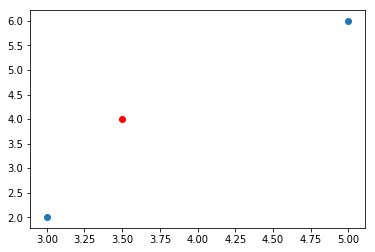

In [2]:
plt.scatter(x=[3, 5], y=[2, 6]); _p = plt.scatter(x=[3.5], y=[4], color='red')

In two dimensions, we can measure the distance between the points $(x_1,y_1)$ and $(x_2,y_2)$ using Pythagoras Theorem:

\begin{equation}
d(a,b) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2)}
\end{equation}

This can be generalised into more dimensions like this:

\begin{equation*}
d(a,b) = \sqrt{\sum_{i=1}^n (a_i - b_i)^2}
\end{equation*}

where $a_i$ is the $i$th feature for point $A$.  It's easy to picture this in two or three dimensions, when you 
have more dimensions, the maths is the same but you can't picture it.

Let's look at some data for describing cars and their MPG ragings:

In [3]:
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
autompg = pd.read_csv('files/auto-mpg.data', delim_whitespace=True, names=names)
autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


We could ask which is more similar to the "chevrolet chevelle malibu" - the "buick skylark 320" or the "plymouth satellite"? 

In [42]:
# drop the name so that we just have the numerical columns
autompgN = autompg.drop('name', axis=1)

A = autompgN.loc[0]
B = autompgN.loc[1]
C = autompgN.loc[2]

# simple subtraction of two Series shows the difference
A-B

mpg               3.0
cylinders         0.0
displacement    -43.0
horsepower      -35.0
weight         -189.0
acceleration      0.5
year              0.0
origin            0.0
dtype: float64

In [43]:
# compute the sum of squares and take the square root
np.sqrt(np.square(A-B).sum()) 

196.98794379352256

In [6]:
np.sqrt(np.square(A-C).sum())

71.73562573784382

## Normalising Variables

- in this case, the units of each variable are quite different
   - cylinders varies from 3 to 8
   - displacement from 68 to 455
   - weight from 1613 to 5140
- this means that a difference in weight would dominate the other variables
- solution is to normalise the data 

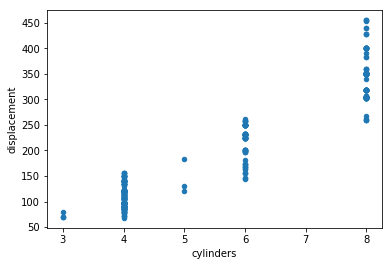

In [7]:
autompg.plot('cylinders', 'displacement', 'scatter')

(0, 450)

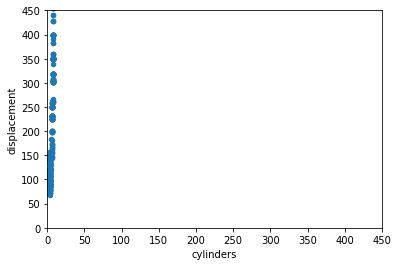

In [8]:
# plot again on equally spaced axes
autompg.plot('cylinders', 'displacement', 'scatter')
plt.ylim(0,450)
plt.xlim(0,450)

## Normalising Variables

- normalise to make the mean and standard deviation the same for every variable
- for each column:
   - subtract the mean
   - divide by the standard deviation
- result is data with mean of 0, std of 1.0 

(-1, 1)

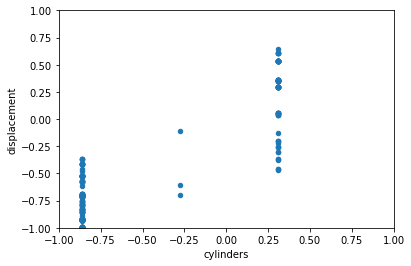

In [9]:
# subtract the mean, divide by the standard deviation
autompg_norm = (autompgN-autompgN.mean())/autompgN.std()
autompg_norm.plot('cylinders', 'displacement', 'scatter') 
plt.ylim(-1,1)
plt.xlim(-1,1) 

In [10]:
print("Without normalisation:")
print("A -> B", np.sqrt(np.square(autompgN.iloc[0]-autompgN.iloc[1]).sum()))
print("A -> C", np.sqrt(np.square(autompgN.iloc[0]-autompgN.iloc[2]).sum()))
print("With normalisation:")
print("A -> B", np.sqrt(np.square(autompg_norm.iloc[0]-autompg_norm.iloc[1]).sum()))
print("A -> C", np.sqrt(np.square(autompg_norm.iloc[0]-autompg_norm.iloc[2]).sum()))

Without normalisation:
A -> B 196.98794379352256
A -> C 71.73562573784382
With normalisation:
A -> B 1.107146840365627
A -> C 0.6471676014562091



### Other Distance Metrics

This is the simplest distance metric but there are other possible ways to measure distance.   The text has a more general formula for the *Minkowski distance*:

\begin{equation*}
d(a,b) = (\sum_{i=1}^d |a_i - b_i|^p)^{1/p}
\end{equation*}

in the case when $p=2$ this is the Euclidean distance we've used above. 

When $p=1$ this is the city block 
or Manhattan distance which is just the sum of the differences between each dimension. 

Text(4.5,2.5,'manhattan=6')

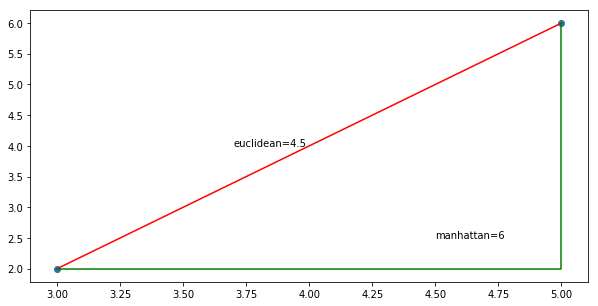

In [44]:
x=[3, 5]; y=[2, 6]
e= np.sqrt(np.square(5-3) + np.square(6-2))
m = (5-3) + (6-2)
plt.figure(figsize=(10, 5));plt.scatter(x, y); plt.plot(x, y, color='red');plt.plot([3, 5, 5], [2, 2, 6], color='green')
plt.text(3.7, 4, 'euclidean={:.2}'.format(e));plt.text(4.5, 2.5, 'manhattan={}'.format(m))

Manhattan distance is
much faster to compute than Euclidean since there are just additions, no multiplications or square roots needed.
It can be just as effective when we're clustering so for large data sets it can save some time processing 
the data.